In [8]:
from prepro import *
from utils import *
import librosa
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from hyperparams import Hyperparams as hp

In [12]:
(hp.bin_size_y[1]*hp.sr-(hp.win_length-1))/((hp.hop_length)*hp.r)

47

In [17]:
def get_spectrograms(sound_file): 
    '''Extracts melspectrogram and log magnitude from given `sound_file`.
    Args:
      sound_file: A string. Full path of a sound file.

    Returns:
      Transposed S: A 2d array. A transposed melspectrogram with shape of (T, n_mels)
      Transposed magnitude: A 2d array.Has shape of (T, 1+hp.n_fft//2)
    '''
    # Loading sound file
    y, sr = librosa.load(sound_file, sr=hp.sr) # or set sr to hp.sr.
    
    # stft. D: (1+n_fft//2, T)
    D = librosa.stft(y=y,
                     n_fft=hp.n_fft, 
                     hop_length=hp.hop_length, 
                     win_length=hp.win_length) 
    
    # magnitude spectrogram
    magnitude = np.abs(D) #(1+n_fft/2, T)
    
    # power spectrogram
    power = magnitude**2 #(1+n_fft/2, T) 
    
    # mel spectrogram
    S = librosa.feature.melspectrogram(S=power, n_mels=hp.n_mels) #(n_mels, T)

    return np.transpose(S.astype(np.float32)), np.transpose(magnitude.astype(np.float32)) # (T, n_mels), (T, 1+n_fft/2)

In [2]:
texts, sound_files = load_train_data()

In [4]:
_text = texts[0]

In [20]:
y,sr = librosa.load(_text,sr=hp.sr)

In [22]:
D = librosa.stft(y,n_fft=hp.n_fft,hop_length=hp.hop_length,win_length=hp.win_length)
D.shape

(1025, 179)

In [23]:
magnitude = np.abs(D)

In [25]:
power = magnitude**2

In [27]:
S=librosa.feature.melspectrogram(S=power,n_mels=hp.n_mels)

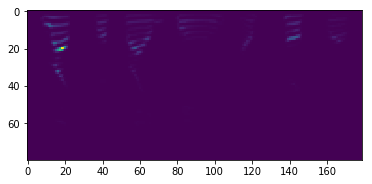

In [28]:
plt.imshow(S)

In [34]:
S1 = librosa.feature.melspectrogram(S=power,n_mels=hp.n_mels)

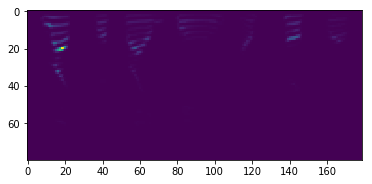

In [35]:
plt.imshow(S1)

In [5]:
_spectrogram_in, _magnitude_in = get_spectrograms(_text)

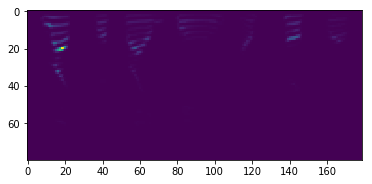

In [10]:
plt.imshow(np.transpose(_spectrogram_in))

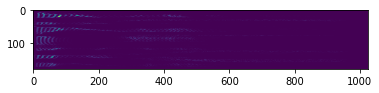

In [14]:
plt.imshow(_magnitude_in)

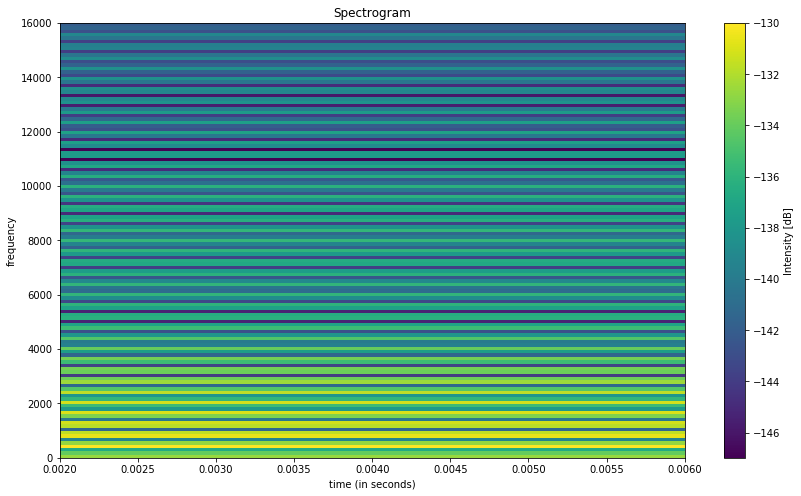

In [12]:
def plot_specgram(data, title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    pxx,  freq, t, cax = plt.specgram(data, Fs=32000)
    fig.colorbar(cax).set_label('Intensity [dB]')

plot_specgram(_spectrogram_in,title='Spectrogram', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))